In this exercise, we have analyzed a dataset comprising of attributes of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each. The dataset has been sourced from UCI Machine Learning repository (link:https://archive.ics.uci.edu/ml/datasets/seeds). The data has seven attributes and has been labelled into three different wheat varieties.

### Loading the data

In [1]:
import pandas as pd
import numpy as np

In [167]:
data=pd.read_csv('seeds_dataset.csv',delimiter='\t',header=None,names=['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove','Wheat Variety'])

### Data Exploration

In [102]:
data.head()

,Area,Perimeter,Compactness,Kernal Length,Kernal Width,Asymmetry Coefficient,Length of kernal groove,Wheat Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [168]:
data['Wheat Variety'] = data['Wheat Variety'].map({1.0:'Kama' , 2.0:'Rosa',3.0:'Canadian'}) #changing the labels to wheat variety names

In [16]:
data.head()

,Area,Perimeter,Compactness,Kernal Length,Kernal Width,Asymmetry Coefficient,Length of kernal groove,Wheat Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [17]:
data.describe() # Data description

,Area,Perimeter,Compactness,Kernal Length,Kernal Width,Asymmetry Coefficient,Length of kernal groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [18]:
data['Wheat Variety'].describe() #Target description

count          210
unique           3
top       Canadian
freq            70
Name: Wheat Variety, dtype: object

### Data visualizations of the features

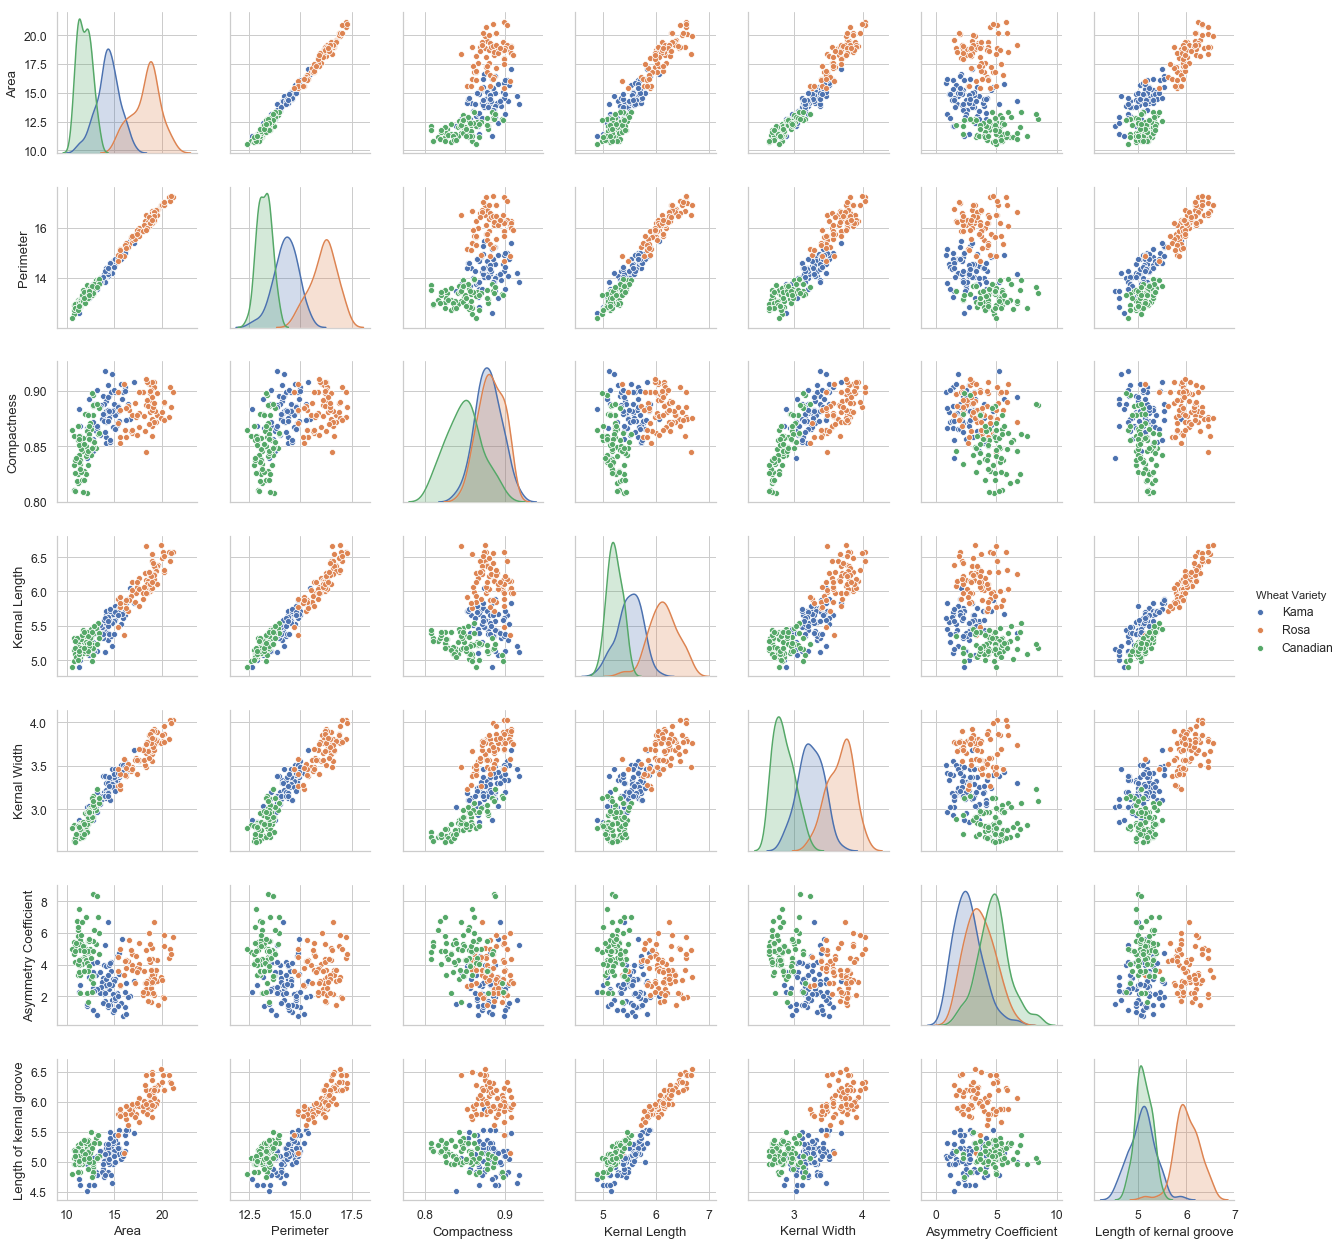

In [19]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=data, vars=data.columns[0:7], hue='Wheat Variety')

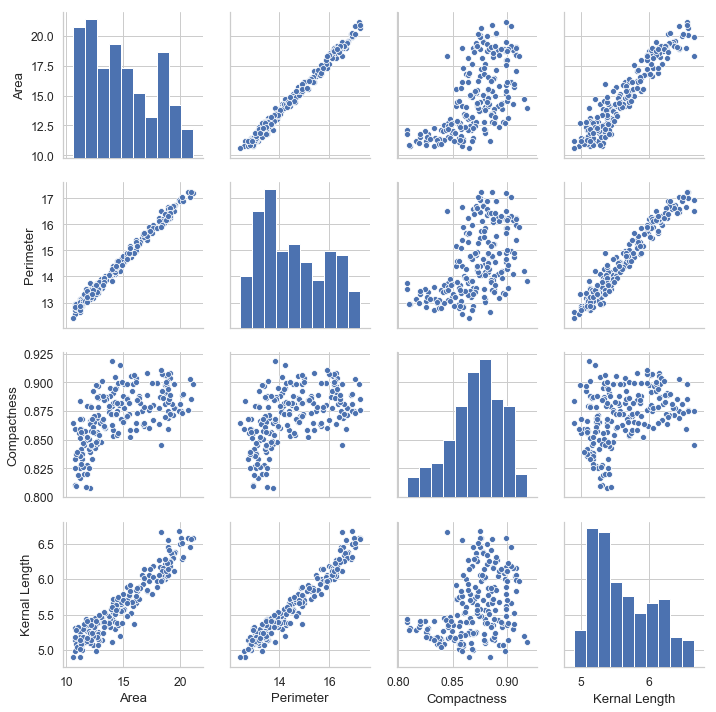

In [21]:
grid = sns.pairplot(data=data, vars=data.columns[0:4])

### K-Means Estimation

In [169]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

### Compare the k-means labels to the Iris dataset’s target values

In [170]:
print(kmeans.labels_[0:70])  # Kama

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0]


In [24]:
print(kmeans.labels_[70:140]) #Rosa

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2]


In [25]:
print(kmeans.labels_[140:210]) #Canadian

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


##### Since the data is labeled, we can assess the accuracy of k-mean model

In [171]:
data['Cluster'] = data['Wheat Variety'].map({'Kama':2 ,'Rosa':1,'Canadian':0}) #create a new column to 

In [172]:
data.head()

,Area,Perimeter,Compactness,Kernal Length,Kernal Width,Asymmetry Coefficient,Length of kernal groove,Wheat Variety,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama,2


#### We can create a confusion matrix and classification report based on the labels and actual data

In [174]:
from sklearn.metrics import confusion_matrix, classification_report
confusion=confusion_matrix(data['Cluster'], kmeans.labels_)
print(confusion) # kmeans model knows the labels
print(classification_report(data['Cluster'], kmeans.labels_))

[[68  0  2]
 [ 0 60 10]
 [ 9  1 60]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        70
           1       0.98      0.86      0.92        70
           2       0.83      0.86      0.85        70

   micro avg       0.90      0.90      0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



#### Cluster centroids

In [177]:
print(kmeans.cluster_centers_) # cluster centroids

[[11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]]


### Principal Component Analysis to reduce data to two dimensions

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
wheat_pca = pca.transform(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)
wheat_pca.shape

(210, 2)

### Visualizing the reduced data

In [29]:
wheat_pca_df = pd.DataFrame(wheat_pca, 
                           columns=['Component 1', 'Component 2'])
wheat_pca_df['Wheat Variety'] = data['Wheat Variety']

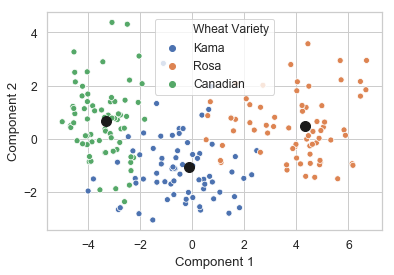

In [30]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=wheat_pca_df, hue='Wheat Variety', legend='brief', 
                       x='Component 1', y='Component 2') 

wheat_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wheat_centers[:,0], wheat_centers[:,1], s=100, c='k')

### Principal Component Analysis to reduce data to three dimensions

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=11)  # reduce to two components
pca.fit(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=11,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
wheat_pca = pca.transform(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)
wheat_pca.shape

(210, 3)

#### Visualizing the reduced data

In [104]:
wheat_pca_3df = pd.DataFrame(wheat_pca, 
                           columns=['Component 1', 'Component 2','Component 3'])
wheat_pca_3df['Wheat Variety'] =data['Wheat Variety'].map({'Kama':'red' , 'Rosa':'green','Canadian':'blue'})


<Figure size 432x288 with 0 Axes>

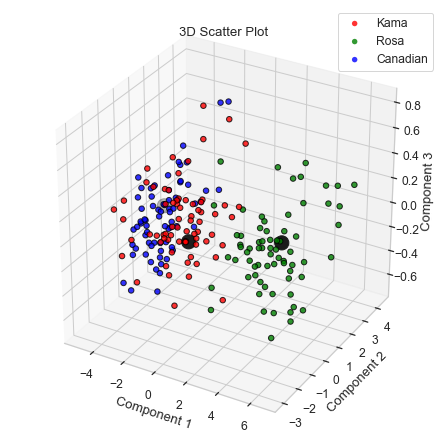

In [131]:
g1 = (wheat_pca_3df['Component 1'][:70],wheat_pca_3df['Component 2'][:70],wheat_pca_3df['Component 3'][:70])
g2 = (wheat_pca_3df['Component 1'][70:140],wheat_pca_3df['Component 2'][70:140],wheat_pca_3df['Component 3'][70:140])
g3 = (wheat_pca_3df['Component 1'][140:210],wheat_pca_3df['Component 2'][140:210],wheat_pca_3df['Component 3'][140:210])
data=(g1,g2,g3)
colors = ("red", "green", "blue")
groups=('Kama','Rosa','Canadian')

fig = plt.figure()
fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(1, 1, 1)
ax = Axes3D(fig) # Method 1

for data, color, group in zip(data, colors, groups):
    x,y,z=data

    
    ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

wheat_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wheat_centers[:,0], wheat_centers[:,1], s=200, c='k')
plt.title('3D Scatter Plot')
    
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.show()

### K-Means Clustering, no. of clusters=4

In [151]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=11)  # find three clusters
kmeans.fit(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

In [155]:
print(kmeans.cluster_centers_) # cluster centroids

[[14.10067797 14.19559322  0.87822373  5.47557627  3.21254237  2.37005424
   5.06584746]
 [16.40806452 15.31935484  0.87826452  5.86396774  3.46332258  3.85009677
   5.69045161]
 [11.91861111 13.25680556  0.85122222  5.225625    2.86531944  4.8855
   5.08747222]
 [19.15104167 16.46916667  0.88708958  6.26885417  3.7729375   3.46041667
   6.12725   ]]


#### Principal Component Analysis to reduce data to two dimensions

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
  svd_solver='auto', tol=0.0, whiten=False)

In [157]:
wheat_pca = pca.transform(data[['Area','Perimeter','Compactness','Kernal Length','Kernal Width','Asymmetry Coefficient','Length of kernal groove']].values)
wheat_pca.shape

(210, 2)

#### Data visualization

In [158]:
wheat_pca_df = pd.DataFrame(wheat_pca, 
                           columns=['Component 1', 'Component 2'])


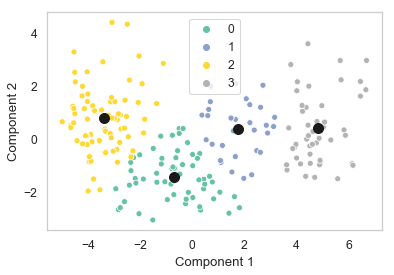

In [163]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=wheat_pca_df, hue=kmeans.labels_, legend='brief', 
                       x='Component 1', y='Component 2', palette="Set2") 

wheat_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wheat_centers[:,0], wheat_centers[:,1], s=100, c='k')

In [ ]:
from collections import Counter
temp_labels = train_labels.reshape(73257).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
plt.xticks(range(len(temp_labels)), temp_labels.keys())
temp_labels = test_labels.reshape(26032).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
plt.legend()
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')
plt.show()

In [ ]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img.sort()
    img=train_images[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
labelbinarizer--It assigns a unique value or number to each label in a categorical feature.

In [ ]:
##https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/(image_normalization)

In [ ]:
https://github.com/khanhnamle1994/fashion-mnist/blob/master/CNN-1Conv.ipynb

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history1 = aux_model.fit_generator(batches, steps_per_epoch=48000//128, epochs=30,
                    validation_data=(X_val, y_val),
                              callbacks=[lr_schedule])

We can see that cluster centroids are less isolated when number of clusters=4. 